# Most In-Demand Skills for Data Analysts in Germany

In this project, our objective is to extract the most sought-after skills for Data Analysts in Germany from LinkedIn.

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import random
from selenium.webdriver.common.by import By
import os
import codecs
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
import matplotlib.pyplot as plt

# Displaying full dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Total number of jobs to be scraped from LinkedIn
num_jobs=120

# Skills to extract
skills = ['excel', 'sql', 'python', 'tableau', 'r', 'powerbi','power', 'bi', 'looker', 'hadoop', 'spark', 
    'sql', 'java', 'c++', 'javascript', 'perl', 'bash', 'git', 'docker', 'kubernetes', 'linux', 'unix', 'apache', 'nginx']

# First Part: Functions

### Saving Job HTML

This function initiates a Chrome browser session, navigates to the LinkedIn website, and iterates through each data analyst job listing, saving its HTML representation into a folder on the desktop.

In [3]:
# Extract a specified number of jobs
def extract():
    # Visit website in fullscreen
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get("https://de.linkedin.com/jobs/search?keywords=Data%2BAnalyst&location=Deutschland&geoId=101282230&trk=public_jobs_jobs-search-bar_search-submit&currentJobId=3909674265&position=1&pageNum=0")
    driver.fullscreen_window()
    
    # Allow time for the website to load
    time.sleep(3)
    
    # Click on each job to capture its corresponding HTML file
    for i in range(num_jobs):
        # Select job
        job = driver.find_element(By.XPATH, '//*[@id="main-content"]/section[2]/ul/li[' + str(i + 1) + ']')
        job.click()

        # Introducing random delays to simulate human-like interaction and prevent LinkedIn from blocking access
        time.sleep(random.randint(5, 20))

        # Save HTML code
        h = driver.page_source
        n=os.path.join(r'C:\Users\Maurice\Desktop\LinkedInJobs\\' + 'Job' + str(i + 1) + '.html')
        f = codecs.open(n, "w", "utf−8")
        f.write(h)    
    
    # Close Chrome browser window
    driver.quit()
    print('Extracting Successful!')

### Extracting Job Details

This function parses the job title, company name, location, and job description from each HTML file into a dictionary. Subsequently, each dictionary is appended to a list.

In [4]:
# Extracts job details from soup. Each set of job details is stored in a dictionary and subsequently appended to a list
def transform(soup):
    job_title_tag = soup.find('h2', class_='top-card-layout__title')
    job_title = job_title_tag.text if job_title_tag else 'N/A'

    company_tag = soup.find('a', class_='topcard__org-name-link topcard__flavor--black-link')
    company = company_tag.text.strip() if company_tag else 'N/A'

    location_tag = soup.find('span', class_='topcard__flavor topcard__flavor--bullet')
    location = location_tag.text.strip() if location_tag else 'N/A'

    description_tag = soup.find('div', class_='show-more-less-html__markup show-more-less-html__markup--clamp-after-5 relative overflow-hidden')
    description = description_tag.text.strip() if description_tag else 'N/A'
    
    job = {
        'job_title': job_title,
        'company': company,
        'location': location,
        'description': description
    }
    
    joblist.append(job)

### Preprocess Job Description

This function formats the job description so that we can extract the skills more easily.

In [5]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

### Extracting Skills

In [6]:
def extract_skills(words):
    return [word for word in words if word in skills]

### Special Case "Power BI"

PowerBi can be written as "power bi" or "powerbi". That's why we have to check for each case.

In [7]:
def process_powerbi(skills):
    if 'powerbi' in skills:
        skills = [skill for skill in skills if skill not in ('bi', 'power')]
    elif 'power' in skills and 'bi' in skills:
        skills = [skill for skill in skills if skill not in ('bi', 'power')]
        skills.append('powerbi')
    else:
        skills = [skill for skill in skills if skill not in ('bi', 'power')]
    return skills

# Second Part: Main Script

First, we run our bot and save the HTML for each job into a folder.

In [8]:
# extract()

Next, we extract the job details and save them into a dataframe.

In [9]:
# Each set of job details is stored in a dictionary and subsequently appended to this list
joblist = []

# This loop opens each HTML file and extracts the job details
for i in range(num_jobs):
    
    html_file_path = r'C:\Users\Maurice\Desktop\LinkedInJobs\\' + 'Job' + str(i + 1) + '.html'

    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()

    soup = BeautifulSoup(html_content, 'lxml')
    
    transform(soup)
    

# Storing job details in a dataframe
df = pd.DataFrame(joblist)

# Include only jobs categorized as data analyst positions
df = df[df['job_title'].str.contains('Data') & df['job_title'].str.contains('Analyst')]
df

,job_title,company,location,description
0,Data Analyst,GLS/NXT,"Berlin, Deutschland",About this positionWe are looking for a highly...
1,Data Analyst,Pluxee,Frankfurt/Rhein-Main,Pluxee is a global player in employee benefits...
2,Junior Data Analyst,GLADTOBE (former drtv.agency),Region Stuttgart,Junior Data Analyst (All Genders)Empower brand...
3,Data Analyst (d/m/w),Akkodis,"Berlin, Deutschland",Sind Sie auf der Suche nach neuen und spannend...
4,Data Analyst,Pertemps ERP (part of Network EMEA),"Sachsen, Deutschland",NEW Urgent Role: Applications Specialist.Locat...
...,...,...,...,...
114,Data Analyst - Inventur & Bestandsführung (w/m/d),dm-drogerie markt Deutschland,Karlsruhe und Umgebung,Das Inventur-Team ist Teil des Ressorts Finanz...
115,Lead Data Analyst (f/m/d),Kolibri Games,"Berlin, Deutschland",Lead Data Analyst (f/m/d)As a Lead Game Data A...
117,Data Analyst / Performance Analyst Renewable E...,ENGIE Deutschland,Berlin,ACT NOW! At ENGIE Deutschland Erneuerbare GmbH...
118,Data Analyst (0 Experience Required),Peroptyx,"Berlin, Deutschland",We need people on the ground in Germany to eva...


The description will undergo preprocessing to simplify the extraction of skills.

In [10]:
df['processed_description'] = df['description'].apply(preprocess_text)
df

,job_title,company,location,description,processed_description
0,Data Analyst,GLS/NXT,"Berlin, Deutschland",About this positionWe are looking for a highly...,"[positionwe, looking, highly, motivated, exper..."
1,Data Analyst,Pluxee,Frankfurt/Rhein-Main,Pluxee is a global player in employee benefits...,"[pluxee, global, player, employee, benefits, e..."
2,Junior Data Analyst,GLADTOBE (former drtv.agency),Region Stuttgart,Junior Data Analyst (All Genders)Empower brand...,"[junior, data, analyst, gendersempower, brands..."
3,Data Analyst (d/m/w),Akkodis,"Berlin, Deutschland",Sind Sie auf der Suche nach neuen und spannend...,"[sind, sie, auf, der, suche, nach, neuen, und,..."
4,Data Analyst,Pertemps ERP (part of Network EMEA),"Sachsen, Deutschland",NEW Urgent Role: Applications Specialist.Locat...,"[new, urgent, role, applications, specialistlo..."
...,...,...,...,...,...
114,Data Analyst - Inventur & Bestandsführung (w/m/d),dm-drogerie markt Deutschland,Karlsruhe und Umgebung,Das Inventur-Team ist Teil des Ressorts Finanz...,"[das, inventurteam, ist, teil, des, ressorts, ..."
115,Lead Data Analyst (f/m/d),Kolibri Games,"Berlin, Deutschland",Lead Data Analyst (f/m/d)As a Lead Game Data A...,"[lead, data, analyst, fmdas, lead, game, data,..."
117,Data Analyst / Performance Analyst Renewable E...,ENGIE Deutschland,Berlin,ACT NOW! At ENGIE Deutschland Erneuerbare GmbH...,"[act, engie, deutschland, erneuerbare, gmbh, e..."
118,Data Analyst (0 Experience Required),Peroptyx,"Berlin, Deutschland",We need people on the ground in Germany to eva...,"[need, people, ground, germany, evaluate, vali..."


After preprocessing, the skills can be extracted.

In [11]:
# Apply the skill extraction to the processed descriptions
df['skills'] = df['processed_description'].apply(extract_skills)

# Remove duplicates in each row
df['skills'] = df['skills'].apply(lambda x: list(set(x)))

# PowerBi is a special case because it is often written with a space (e.g. "power bi", not "powerbi")
df['skills'] = df['skills'].apply(process_powerbi)
df

,job_title,company,location,description,processed_description,skills
0,Data Analyst,GLS/NXT,"Berlin, Deutschland",About this positionWe are looking for a highly...,"[positionwe, looking, highly, motivated, exper...","[python, looker, sql, r]"
1,Data Analyst,Pluxee,Frankfurt/Rhein-Main,Pluxee is a global player in employee benefits...,"[pluxee, global, player, employee, benefits, e...","[sql, powerbi]"
2,Junior Data Analyst,GLADTOBE (former drtv.agency),Region Stuttgart,Junior Data Analyst (All Genders)Empower brand...,"[junior, data, analyst, gendersempower, brands...",[sql]
3,Data Analyst (d/m/w),Akkodis,"Berlin, Deutschland",Sind Sie auf der Suche nach neuen und spannend...,"[sind, sie, auf, der, suche, nach, neuen, und,...","[python, tableau, sql, r]"
4,Data Analyst,Pertemps ERP (part of Network EMEA),"Sachsen, Deutschland",NEW Urgent Role: Applications Specialist.Locat...,"[new, urgent, role, applications, specialistlo...",[]
...,...,...,...,...,...,...
114,Data Analyst - Inventur & Bestandsführung (w/m/d),dm-drogerie markt Deutschland,Karlsruhe und Umgebung,Das Inventur-Team ist Teil des Ressorts Finanz...,"[das, inventurteam, ist, teil, des, ressorts, ...","[python, sql, r, tableau, powerbi]"
115,Lead Data Analyst (f/m/d),Kolibri Games,"Berlin, Deutschland",Lead Data Analyst (f/m/d)As a Lead Game Data A...,"[lead, data, analyst, fmdas, lead, game, data,...","[java, python, looker]"
117,Data Analyst / Performance Analyst Renewable E...,ENGIE Deutschland,Berlin,ACT NOW! At ENGIE Deutschland Erneuerbare GmbH...,"[act, engie, deutschland, erneuerbare, gmbh, e...","[python, powerbi]"
118,Data Analyst (0 Experience Required),Peroptyx,"Berlin, Deutschland",We need people on the ground in Germany to eva...,"[need, people, ground, germany, evaluate, vali...",[]


Skills are counted and...

In [12]:
# Flatten the list of skills and count the occurrences
all_skills = [skill for sublist in df['skills'] for skill in sublist]
skill_counts = Counter(all_skills)

then converted into a percentage of job listings demanding the skill.

In [13]:
# Calculate percentage of job listings demanding the skill
for skill, count in skill_counts.items():
    skill_counts[skill] = (count / len(df))*100

Finally, the results can be visualized.

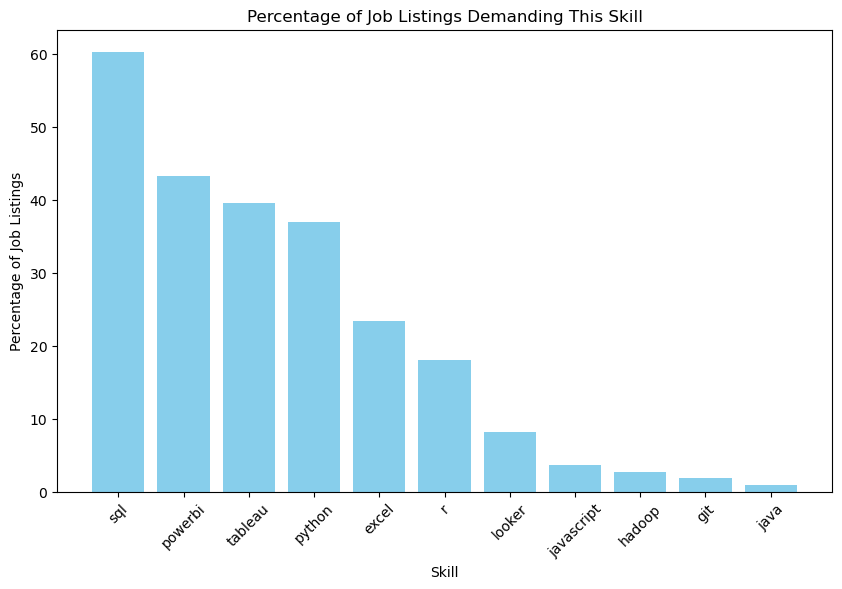

In [14]:
# Convert the skills to a DataFrame
most_common_skills = skill_counts.most_common()
skill_df = pd.DataFrame(most_common_skills, columns=['Skill', 'Count'])

# Plot the most common skills
plt.figure(figsize=(10, 6))
plt.bar(skill_df['Skill'], skill_df['Count'], color='skyblue')
plt.xlabel('Skill')
plt.ylabel('Percentage of Job Listings')
plt.title('Percentage of Job Listings Demanding This Skill')
plt.xticks(rotation=45)
plt.show()

In conclusion, the top five most sought-after skills for Data Analysts in Germany are SQL, PowerBI, Tableau, Python, and Excel.